![Title](Images/cisco.png)

# Lab - Descriptive Statistics in Python 


### Objectives
<p>
<li>**Part 1: Analyzing the Data**</li>
<li>**Part 2: Visualizing the Data**</li>
</p>
### Scenario/Background

In this lab, I will import a data set into a pandas frame and generate descriptive statistics from the data. I will format text strings report the descriptive statistics and generate a plot of the data. Finally, I will experiment with parameters of the graph to become familiar with plotting data using the `matplotlib.pyplot` libary.

### Required Resources

* Raspberry Pi version 2 or higher
* 1 PC with network access for connection Raspberry Pi
* Python libraries: pandas and matplotlib.pyplot
* Datafiles: ping_from_lab_2.csv

## Part 1: Analyzing the Data

The goal of the first part of the lab is to use pandas methods to import a dataset and generate the following descriptive statistics:

1. sample size
2. mean
3. median
4. standard deviation
5. minimum, maximum, and range of values

#### Step 1: Setup the environment and import data.

First, I will import the modules and set up the enivronment to display `matplotlib` output to the notebook page. I will use `pandas` to import data from a csv file into a dataframe. I will be working with a file that contains measurements of latency (in milliseconds). The data is used to analyze the time that it takes for the ping to return to my computer.

a) Import modules and set up the environment.

In [1]:
# Code cell 1
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib.use('qt5agg')

# given
%matplotlib inline
# import matplotlib
 # required on some Jupyter Notebook installations

b) Import the data from the `ping_from_lab_2.csv` file using the pandas read_csv method. Use "data" as the name of the dataframe.

In [2]:
# Code cell 2
# import the csv into the dataframe
data = pd.read_csv("./Data/ping_from_lab_2.csv")

c) Check that the file imported properly by using the pandas `head` and `tail` methods for the dataframe.

In [3]:
# Code cell 3
# view the contents of the first five rows in the dataframe
data.head() 

,Ping
0,6.791
1,10.185
2,10.606
3,15.865
4,15.470


In [4]:
# Code cell 4
# view the contents of the last five rows in the dataframe
data.tail(5)

,Ping
95,4.511
96,4.126
97,4.664
98,5.641
99,4.188


From the output of the tail method, you will notice that there are 100 rows of data in the file. Although it is only one column, pandas handles this file very efficiently.

#### Step 2: Use pandas to view a table of descriptive statistics for the file.

pandas includes a number of powerful methods for displaying basic statistics on a dataset.

a) The `dataframe.describe()` method displays statistics for the datraframe.

In [5]:
# Code cell 5
# use the describe method of the new dataframe to view the table of statistics
data.describe () 

,Ping
count,100.000000
mean,7.718850
std,2.940372
min,3.841000
25%,5.420750
50%,6.837500
75%,9.546250
max,15.865000


b) To work with rounded values in the datset, you can add a new column to the data for them. In pandas, columns are accessed by their headings. To create a new column, the name of the new column is used, in quotes, in square brackets as an index for the dataframe. The `round()` method is used to round the values in the ping column to populate a new column with the rounded values.

In [6]:
# Code cell 6
# Add a new column to the dataframe and populate it with rounded weights.
data['rounded'] = data.Ping.round(2)
# Verify that values were added.
data.head(10) 

,Ping,rounded
0,6.791,6.79
1,10.185,10.18
2,10.606,10.61
3,15.865,15.86
4,15.470,15.47
5,12.433,12.43
6,5.432,5.43
7,5.250,5.25
8,7.123,7.12
9,6.358,6.36


c) It is possible to fill a column with calculated values as well. For example, 

<pre><code>dataframe['c'] = dataframe['a'] - dataframe['b']</code></pre>

will result in the creation of column c in the dataframe and populate it with the difference between the numeric values in column a and b.

Create a new column in the dataframe called "diff" and populate that column with the latency over or under the target value of  10 milliseconds. Use the rounded value for the calculation.

In [7]:
# Code cell 7
# Create the new column named "diff" and fill it with values.
data['diff'] = data['rounded'] - 10

# Check the result.
data.head(10) 

,Ping,rounded,diff
0,6.791,6.79,-3.21
1,10.185,10.18,0.18
2,10.606,10.61,0.61
3,15.865,15.86,5.86
4,15.470,15.47,5.47
5,12.433,12.43,2.43
6,5.432,5.43,-4.57
7,5.250,5.25,-4.75
8,7.123,7.12,-2.88
9,6.358,6.36,-3.64


#### Step 3: Display Descriptive Statistics in Text

In this step I will create variables to hold a series of descriptive statistics and then construct strings to display the values. I will use the following:

* `count()` 
* `mean()`
* `median()`
* `std()`
* `min()`
* `max()`

a) Use the values in the rounded column of the dataframe. Create a variable for each statistic and calculate the range of values using `min()` and `max()` to compute the range of values.

In [25]:
# Code cell 8
# Create a variables to hold values for the dataset rounded column 
count = data['rounded'].count()
mean = data['rounded'].mean()
median = data['rounded'].median()
std = data['rounded'].std()
rng = data.rounded.max() - data.rounded.min()

b) To construct strings that use text and variables to report on the statistics for the data set, use `format()` string method to make it easier to insert the variable values into the strings. Format uses `{}` placeholders to indicate where the variables values should be inserted.

Construct sentences such as 'The mean of the distribution is...' for each created variable. For the last statement, include the `min()`, `max()`, and range values in the same sentences to practice using multiple placeholders. You can combine other variables in the same sentence as well.

In [26]:
# Code cell 9
# Create variables to hold your statements.
countstring = "There are {} records in the file.".format(count)
meanstring = "The mean of the distribution is {} and the median is {}.".format(mean, median)
stdstring = "The standart deviation of the distribution is {}.".format(std)
rangestring = "The minimum value  is {}, the maximum is {}, and the range is {}.".format(data.rounded.min(), data.rounded.max(), rng)

c) Use the `print` function to output all of your statements.

In [27]:
# Code cell 10
# Print all of your statements
print(countstring)
print(meanstring)
print(stdstring)
print(rangestring)

There are 100 records in the file.
The mean of the distribution is 7.718699999999999 and the median is 6.84.
The standart deviation of the distribution is 2.9404561094009094.
The minimum value  is 3.84, the maximum is 15.86, and the range is 12.02.


Look at the output for standard deviation. You can format the number so it is easier to understand the results. For example, you can change the output of the standard deviation to display only first 2 digitals after the decimal point.

Python document for formatting the strings:

https://docs.python.org/2/library/string.html

This link provides some formatting examples:

https://mkaz.tech/code/python-string-format.html

In [29]:
# Code cell 11

# Format the standard deviation result to 2 decimal points
count = data.rounded.count()
stdstring = 'The standard deviation of the distribution is {:.2f}.'.format(std)
print(stdstring)

The standard deviation of the distribution is 2.94.


## Part 2: Visualizing the Data

In this part of the lab, you will create a frequencey distribution for each unique value in the dataset.

#### Step 1: Create a dataframe that contains the frequence counts for the dataset.

a) Create a new dataframe to contain frequency counts using the `value_counts()` method. This method creates a series object, not a dataframe. The index column of this series is given by the unique values of the series, with the column name set automatically to 0. To convert a series in a DataFrame, you can use the `to_frame()` function. Additionally calling the `reset_index()` method on the resulting `DataFrame` will transform the previous index column into a new data column, whose name is automatically set to `index`. You will rename the columns later.



</font>I will use the `to_frame()` with the `reset_index()` methods to create a pandas dataframe from the series object. 

I will use the rounded column from the data dataframe with the `value_counts()` method. Example:      <pre><code>variable = dataframe['columnName'].value_counts()</code></pre>

In [88]:
# Code cell 12
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = data['rounded'].value_counts()

# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()

b) Use the `type()` function with variable name as an argument to verify that `freq` is not a dataframe object.

In [43]:
# Code cell 13
# Verify the type of the freq object.
type(freq)

pandas.core.frame.DataFrame

c) Use `head` to look at the new dataframe. The columns in the data frame are not named clearly. Rename them to "value" and "freq" using the columns attribute of the dataframe. Example:
<pre><code>dataframe.columns = ['column1','column2']</code></pre>

In [90]:
# Code cell 14
# Rename the columns in the dataframe. 
freq.columns = ['value', 'freq']
# Verify the result.
freq.head()

,value,freq
0,4.51,2
1,4.56,2
2,6.27,2
3,7.12,2
4,6.72,1


#### Step 2: Plot a graph of the frequency distribution.

a) The `matplotlib.pyplot` module was imported as plt earlier in the lab. The methods from the module is used to format and display a scatter plot of the frequency data for a dataset.

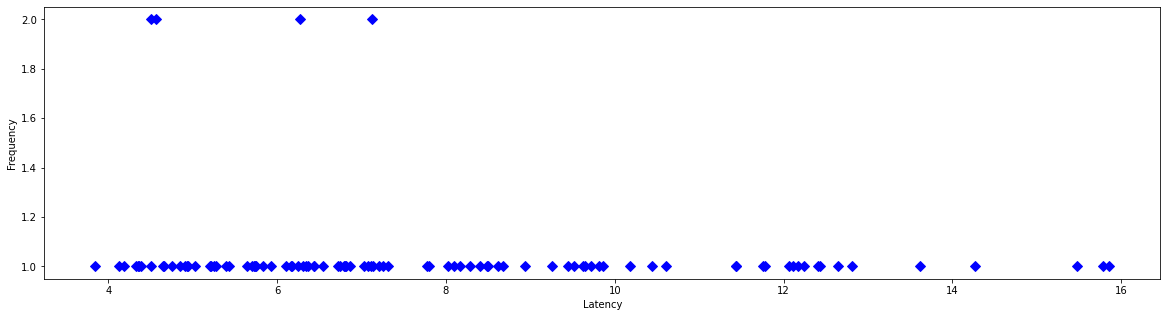

In [87]:
# Code cell 15

# Set a size for the graph
plt.figure(figsize=(20,5))

# Add axis labels
plt.ylabel('Frequency')
plt.xlabel('Latency')

# I prefer to plot the graph using a diamond marker "D" of size 7
plt.plot(freq.value,freq.freq, "D", markersize = 7, color = 'b')

The frequency plot of the values does not resemble the one of a Gaussian distribution, because only 100 values were analyzed and almost all of them were unique.

b) Experiment with plotting the data with different dimensions, markers, markersizes, and colors. Use the links below for the values. You can also use the example above to try different figure dimensions.

markers http://matplotlib.org/api/markers_api.html

colors http://matplotlib.org/api/colors_api.html

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>